# Introduction

### From scalars to tensors

In computer science, [array](https://en.wikipedia.org/wiki/Array_(data_type)) is a data type that represents a collection of elements, each selected by one or more indices. The number of indices needed to specify an element is called the __dimension__, __dimensionality__ or __rank__ (number of dimensions) of the array type.

![Data Types](.images/data_types.webp)

In machine learning, [tensor](https://en.wikipedia.org/wiki/Tensor_(machine_learning)#As_unit_values) is used as a generic term for n-dimensional __array__ of numbers.

| Math Representation |Scientific Python | Python examples | [NumPy](https://numpy.org/devdocs/user/absolute_beginners.html) examples | 
|---------------------|------------------|-----------------|--------------------------------------------------------------------------|
| Scalar | zero-dimensional array (tensor) | ```altitude = 22``` <br> ```latitude = 53.438056``` <br> ```longitude = 14.542222``` | ```altitude = np.int32(22)``` <br> ```latitude = np.float16(53.438056)``` <br> ```longitude = np.float16(14.542222)``` |
| Vector | [one-dimensional array](https://numpy.org/devdocs/user/absolute_beginners.html#array-fundamentals) (tensor) | ```gps_coordinates = [altitude, latitude, longitude]``` | ```gps_coordinates = np.array([altitude, latitude, longitude])``` |
| Matrix | [two-dimensional array](https://numpy.org/devdocs/user/absolute_beginners.html#creating-matrices) (tensor) | ```hvac = [[20.5, 22.0],```<br>&emsp; &emsp; &emsp; &nbsp; ```[23.5, 24.0]]``` | ```hvac = np.array([[20.5, 22.0],```<br>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; ```[23.5, 24.0]])``` |
| Tensor | [n-dimensional array](https://numpy.org/devdocs/user/absolute_beginners.html#creating-matrices) (tensor) | ```hvac = [[[20.5, 22.0],```&emsp; # user profile 1<br>&emsp; &emsp; &emsp; &nbsp; &nbsp;  ```[23.5, 24.0]],```<br>&emsp; &emsp; &emsp; &nbsp;  ```[[21.0, 21.0],```&emsp; # user profile 2<br>&emsp; &emsp; &emsp; &nbsp; &nbsp;  ```[21.0, 21.0]],```<br>&emsp; &emsp; &emsp; &nbsp;  ```[[19.5, 19.5],```&emsp; # user profile 3<br>&emsp; &emsp; &emsp; &nbsp; &nbsp;  ```[20.5, 20.5]]]``` | ```hvac = np.array([[[20.5, 22.0],```&emsp; # user profile 1<br>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &nbsp; &nbsp; ```[23.5, 24.0]],```<br>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &nbsp; ```[[21.0, 21.0],```&emsp; # user profile 2<br>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &nbsp; &nbsp; ```[21.0, 21.0]],```<br>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &nbsp; ```[[19.5, 19.5],```&emsp; # user profile 3<br>&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &nbsp; &nbsp; ```[20.5, 20.5]]])``` |

Definition of __tensor__ by popular ML libraries
- [TensorFlow](https://www.tensorflow.org/guide/tensor)
- [PyTorch](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

Visualization of n-dimensional tensor

![Tensor Types](.images/tensor-types.webp)

### Example - scalar, vector, matrix and tensor

Let's create our data types using [NumPy](https://numpy.org/devdocs/user/absolute_beginners.html#array-attributes) package, display them and their basic attributes:
- [number of array dimensions](https://numpy.org/doc/2.1/reference/generated/numy.ndarray.ndim.html)
- [shape](https://numpy.org/doc/2.1/reference/generated/numpy.ndarray.shape.html)

In [1]:
def display_scalar_vector_matrix_tensor():
    scalar = np.float64(1)
    display_ndarray("scalar", scalar)

    row_vector = np.array([1, 2], dtype=np.float32)
    display_ndarray("row_vector", row_vector)

    column_vector = np.array([[1], [2]], dtype=np.float16)
    display_ndarray("column_vector", column_vector)

    matrix = np.array([[1, 2], [3, 4]])
    display_ndarray("matrix", matrix)

    tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
    display_ndarray("tensor", tensor)

import numpy as np

def display_ndarray(name:str, tensor: np.ndarray | np.number):
    print(f"{name}\nproperties: dtype: {tensor.dtype}, ndim: {tensor.ndim}, shape: {tensor.shape}\n{tensor}\n")

display_scalar_vector_matrix_tensor()

scalar
properties: dtype: float64, ndim: 0, shape: ()
1.0

row_vector
properties: dtype: float32, ndim: 1, shape: (2,)
[1. 2.]

column_vector
properties: dtype: float16, ndim: 2, shape: (2, 1)
[[1.]
 [2.]]

matrix
properties: dtype: int64, ndim: 2, shape: (2, 2)
[[1 2]
 [3 4]]

tensor
properties: dtype: int64, ndim: 3, shape: (2, 2, 2)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]



# Vector embeddings

### History

The idea of embeddings is not new and has its orgins in 1950s with [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) foundational model. 

### Overview

In machine learning, __vector embedding__ (or simply __embedding__) is a numerical representation of __input data__ transformed by a __model__ into array of numbers.
From mathematical point of view, __embedding__ is a _vector_ of floating-point numbers in n-dimensional space. &#x1F610;

| Input data | Model | Embedding |
|-|-|-|
|W Strzebrzeszynie chrząszcz brzmi w trzcinie.| -> | [ 0.06661 -0.35304 -0.04917 ...  0.52945  0.22272 -0.02603] |
|Ala ma kota.| -> | [-0.69986 -0.68237  0.09157 ...  0.76643  0.08707  0.08202] |

No matter of what size __input data__ is, the __model__ always generates __embeddings__ of the same size.

| Model &#x1F917; | Architecture details | Embedding size (number of elements, default) | Paper |
|-|-|-|-|
|[google-bert/bert-base-uncased](https://huggingface.co/google-bert/bert-base-uncased)|12-layer, 768-hidden, 12-heads, 110M parameters| 768 | |
|[google-bert/bert-large-uncased](https://huggingface.co/google-bert/bert-large-uncased)|24-layer, 1024-hidden, 16-heads, 340M parameters| 1024 | |
|[jinaai/jina-embeddings-v2-small-en](https://huggingface.co/jinaai/jina-embeddings-v2-small-en)|4-layer, 512-hidden, 4-heads, 33M parameters | 512 | [Link](https://arxiv.org/pdf/2310.19923) |
|[sentence-transformers/all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2)|12-layer, 768-hidden, 12-heads, 110M parameters | 768 | |
|[sentence-transformers/all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)| | 384 | |

#### Further reading

- [Hugging Face: Massive Text Embedding Benchmark (MTEB) Leaderboard](https://huggingface.co/spaces/mteb/leaderboard)
- [Hugging Face: A wide selection of over 10k pre-trained Sentence Transformers models](https://huggingface.co/models?library=sentence-transformers)
- [SBERT.net: Selection of pre-trained Sentence Transformers models](https://www.sbert.net/docs/sentence_transformer/pretrained_models.html#original-models)

In [2]:
import numpy as np
import math
import pandas as pd
import pathlib
import torch
import torch.nn.functional as F
from numpy.linalg import matrix_rank, norm
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, paired_cosine_distances
from sklearn.metrics.pairwise import euclidean_distances, paired_euclidean_distances
from sklearn import preprocessing as pre
from typing import Any, Callable
from torchview import draw_graph
from transformers import AutoTokenizer, AutoModel
from transformers import PreTrainedTokenizer, PreTrainedTokenizerFast

# available checkpoints
checkpoints = [
    ["google-bert/bert-base-uncased", False, False], #0
    ["google-bert/bert-large-uncased", False, False], #1
    ["jinaai/jina-embeddings-v2-small-en", True, True], #2
    ["sentence-transformers/all-mpnet-base-v2", False, False], #3
    ["sentence-transformers/all-MiniLM-L6-v2", False, False], #4
]

# checkpoint selection
checkpoint = checkpoints[2]

In [3]:
def load_checkpoint(
    checkpoint: str, trust_remote_code: bool = False, output_hidden_states: bool = False
) -> tuple[Any, PreTrainedTokenizer | PreTrainedTokenizerFast, str]:
    
    # device = "cuda" if torch.cuda.is_available() else "cpu"
    
    device = "cpu"
    print(f"Loading '{checkpoint}' model on '{device}' device: {torch.cuda.get_device_name() if device == 'cuda' else None}")
    
    model = AutoModel.from_pretrained(
        checkpoint,
        trust_remote_code=trust_remote_code,
        output_hidden_states=output_hidden_states,
        # device_map=device,
    )
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    return model, tokenizer, device

model, tokenizer, device = load_checkpoint(checkpoint[0], checkpoint[1], checkpoint[2])

Loading 'jinaai/jina-embeddings-v2-small-en' model on 'cpu' device: None


In [4]:
class Embedding():
    """Represents a vector of embeddings."""

    def __init__(self, name: str, sentences: list[str], func: Callable[[str], Any]):
        self.name = name
        self.sentences = sentences
        self.columns = [name, 'Embedding']
        self.embeddings = self._create(func)

    def _create(self, func: Callable[[str], Any]):
        self.embeddings : list[np.ndarray] = []
        for sentence in self.sentences:
            result = func(sentence)
            # with np.printoptions(precision=3, edgeitems=3, threshold=2):
            #     print(f"sentence: {sentence}, result: {result}")
            self.embeddings.append(result)
        return self.embeddings

    def _normalize(self, embeddings, min: int=-1, max: int=1):  # TODO refactor to tuple
        return np.interp(embeddings, (embeddings.min(), embeddings.max()), (min, max))

    def _transform_series(self, value):
        return list(map('{:.2f}'.format, value))

    def reduce_dimensionality_to(self, dimension: int, normalize: tuple[int,int] | None=None):
        pca = PCA(n_components=dimension)
        with_reduced_dimensionality = pca.fit_transform(np.array(self.embeddings))
        if normalize is None:
            return with_reduced_dimensionality
        else:
            return self._normalize(with_reduced_dimensionality, min=normalize[0], max=normalize[1])  # TODO refactor to tuple
    
    def get_data_frame(self):
        df = pd.DataFrame(self.sentences, columns=[self.name])
        df['Embedding'] = self.embeddings
        df['Embedding'] = df['Embedding'].apply(self._transform_series)
        return df

    def get_embeddings(self) -> list[np.ndarray]:
        return self.embeddings

def debug_print(output: Any):
    print(f"{output}")


def get_encoded_sentence_0(sentence: str):# -> np.ndarray:
    # tokenize the input sentence, add special tokens [CLS] and [SEP] required by BERT model
    tokens = tokenizer.encode(sentence, add_special_tokens=True, return_tensors="pt")
    # print(f"tokens:{tokens}")
    return tokens


def get_embedding_1(sentence: str) -> np.ndarray:
    # tokenize the input sentence, add special tokens [CLS] and [SEP] required by BERT model
    inputs = tokenizer.encode(sentence, add_special_tokens=True, return_tensors="pt").to(device)

    with torch.no_grad():  # disable gradient calculation for inference
        outputs = model(inputs)  # get the outputs from the model
        last_hidden_state  = outputs.last_hidden_state  # the last_hidden_state is of shape (batch_size, sequence_length, hidden_size)
        cls_embedding = last_hidden_state[:, 0, :].to('cpu')
        embedding = cls_embedding.squeeze().numpy()
        
    return embedding


def get_embedding_2(sentence: str):# -> np.ndarray:
    # tokenize the input sentence, special tokens [CLS] and [SEP], input IDs and attention mask
    inputs = tokenizer(sentence, truncation=True, padding=True, return_tensors='pt')

    with torch.no_grad():                       # disable gradient calculation for inference
        outputs = model(**inputs)               # get the outputs from the model
        last_hidden_state  = outputs.last_hidden_state   # the last_hidden_state is of shape (batch_size, sequence_length, hidden_size)
        cls_embedding = last_hidden_state[:, 0, :]
        embedding = cls_embedding.squeeze().numpy()
    # return "get_embedding_2", embedding.squeeze().numpy()
    return embedding


def get_embedding_3(sentence: str):# -> np.ndarray:
    """
    similarites are higher than with other get_embedding_ methods
    """
    # tokenize the input sentence, special tokens [CLS] and [SEP] added explicitly, input IDs and attention mask
    token = tokenizer.tokenize(f"[CLS] {sentence} [SEP]")

    input_ids = tokenizer.convert_tokens_to_ids(token)
    input_ids_tensor = torch.tensor([input_ids])

    token_type_ids = [0] * len(token)
    token_type_ids_tensor = torch.tensor([token_type_ids])
    attention_mask = [1] * len(token)
    attention_mask_tensor = torch.tensor([attention_mask])

    inputs = {'input_ids': input_ids_tensor, 'token_type_ids': token_type_ids_tensor, 'attention_mask' : attention_mask_tensor}

    with torch.no_grad():  # disable gradient calculation for inference
        outputs = model(**inputs)  # get the outputs from the model
        last_hidden_state = outputs.last_hidden_state  # the last_hidden_state is of shape (batch_size, sequence_length, hidden_size)
        cls_embedding = last_hidden_state[:, 0, :]
        embedding = cls_embedding.squeeze().numpy()
    
    return embedding


def get_embedding_4(sentence: str, debug: bool=False):# -> np.ndarray:
    inputs = tokenizer.encode_plus(sentence, add_special_tokens=True, return_attention_mask = True, return_tensors = 'pt')

    with torch.no_grad():  # disable gradient calculation for inference
        outputs = model(**inputs)  # get the outputs from the model
        last_hidden_state  = outputs.last_hidden_state  # the last_hidden_state is of shape (batch_size, sequence_length, hidden_size)
        cls_embedding = last_hidden_state[:, 0, :]
        embedding = cls_embedding.squeeze().numpy()

    return embedding

# inputs = tokenizer.encode("I am a sentence.", add_special_tokens=True, return_tensors="pt").to(device)
# with torch.no_grad():  # disable gradient calculation for inference
#     outputs = model(inputs)  # get the outputs from the model
#     last_hidden_state  = outputs.last_hidden_state  # the last_hidden_state is of shape (batch_size, sequence_length, hidden_size)
#     cls_embedding = last_hidden_state[:, 0, :].to('cpu')
#     embedding = cls_embedding.squeeze().numpy()
# get_embedding_1("I am a sentence.")

In [5]:
import os 
os.path.join(pathlib.Path().resolve(), "graphviz" )

'C:\\Workspace\\embeddings\\graphviz'

In [6]:
def display_model(checkpoint: Any, 
                  tokenizer: PreTrainedTokenizer | PreTrainedTokenizerFast, 
                  func: Callable[[str], Any], sentence: str):
    # write in console
    with np.printoptions(precision=3, edgeitems=3, threshold=2):
        encoding = tokenizer(sentence, truncation=True, padding=True, return_tensors='pt', 
                                 return_token_type_ids=True, return_attention_mask = True)
        print(f"#### Sentence ####\n{sentence}\n")

        print(f"#### Encoding ####\n{encoding[0]}")
        print(f"  encoding:\t{encoding}")
        print(f"  input_ids:\t{encoding['input_ids']}")
        print(f"  tokens:\t{[tokenizer.convert_ids_to_tokens(token) for token in encoding['input_ids']]}\n") # type: ignore

        print(f"#### Model ####\n{model}\n")

        embedding = func(sentence)
        print(f"#### Embedding ####")
        display_ndarray('embedding', embedding)
    
    project_path = pathlib.Path().resolve()
    filename = project_path.with_name(model.config._name_or_path.replace('/','_')).name + ".svg"
    model_graph = draw_graph(model, graph_name=model.config._name_or_path, input_data=encoding, 
                            expand_nested=True, roll=True, hide_module_functions=False, hide_inner_tensors=True)
    graph = model_graph.visual_graph
    svg_graph = graph.pipe(format='svg').decode(encoding='utf-8')

    file = os.path.join(pathlib.Path().resolve(), "graphviz", filename)
    with open(file, 'w+') as f:
        f.write(svg_graph)
        f.close()
  
        
display_model(model, tokenizer, get_embedding_1, 'Batman and Robin')


(process:4120): Pango-WARNING **: 11:48:32.851: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


#### Sentence ####
Batman and Robin

#### Encoding ####
Encoding(num_tokens=5, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
  encoding:	{'input_ids': tensor([[ 101, 8942, 1998, 5863,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}
  input_ids:	tensor([[ 101, 8942, 1998, 5863,  102]])
  tokens:	[['[CLS]', 'batman', 'and', 'robin', '[SEP]']]

#### Model ####
JinaBertModel(
  (embeddings): JinaBertEmbeddings(
    (word_embeddings): Embedding(30528, 512, padding_idx=0)
    (token_type_embeddings): Embedding(2, 512)
    (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): JinaBertEncoder(
    (layer): ModuleList(
      (0-3): 4 x JinaBertLayer(
        (attention): JinaBertAttention(
          (self): JinaBertSelfAttention(
            (query): Linear(in_features=512, out_features=512, bias=True)
            (key): L

### Example - calculate vector embeddings from cartoon characters

In this example we will:
1. Define few sentences (for the purpose of this exmaple they're just single words).
2. Calculate vector embeddings from defined sentences using the previously loaded ML model.
3. Display vector embeddings in a tabular form using [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html) toolkit, where
    - table is represented by [pandas.DataFrame](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#pandas-data-table-representation) 
    - table's columns are represented by [pandas.Series](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#each-column-in-a-dataframe-is-a-series) (e.g. Cartoon, Embedding)
    - table's rows are represented by our vector embeddings caclculated from cartoon characters (e.g. Batman &#x1F987; , Joker &#x1F921;)

In [7]:
cartoons = ["Batman", "Asterix", "Popeye", "Joker", "Bruce Wayne", "Gotham"]

# calculate vector embeddings from each sentence using previously loaded model
embedding = Embedding(name='Cartoon', sentences = cartoons, func=get_embedding_1)

# display vector embeddings using Panda's toolkit
pd.set_option('display.max_rows', 6)
pd.set_option('display.precision', 2)
pd.set_option('display.max_colwidth', 100)

df_cartoons = embedding.get_data_frame()
display(df_cartoons)

,Cartoon,Embedding
0,Batman,"[-0.64, -0.36, -0.07, 0.98, -0.07, 0.10, 0.09, 0.68, -0.01, 0.25, 0.43, -0.34, -1.00, -1.07, 0.6..."
1,Asterix,"[-0.31, -0.49, -0.41, 1.11, -0.44, -0.04, -0.12, 0.23, -0.36, 0.38, 0.03, -0.32, -0.18, -0.84, 0..."
2,Popeye,"[0.27, -0.44, -0.06, 0.72, 0.23, -0.18, 0.18, 0.68, -0.17, 0.33, -0.21, -0.66, -1.26, -0.94, 0.7..."
3,Joker,"[-0.81, -0.07, -0.32, 1.14, -0.25, 0.42, -0.13, 0.69, 0.10, 0.30, 0.56, -0.41, -1.03, -0.83, 0.5..."
4,Bruce Wayne,"[-0.37, -0.20, -0.27, 0.61, -0.11, -0.24, 0.15, 0.60, 0.02, 0.09, 0.57, -0.16, -1.27, -0.66, 0.2..."
5,Gotham,"[-0.36, -0.45, 0.16, 1.25, 0.10, 0.13, 0.04, 0.78, -0.19, 0.18, 0.38, -0.30, -1.38, -0.64, 0.66,..."


### Example - visualize vector embeddings in human-readable form

We calculated vector embeddings, but still they are just looking ugly as very loooong arrays of floating point-numbers.<br>We need to display n-dimensional array so that can be
1. Analyzed visually by human
2. Easily plotted

In this example we will
1. Reduce dismensionality of the embedding vectors to 2D and 3D using [scikit-learn](https://scikit-learn.org/stable/index.html) library and its [PCA algorithm](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca).
2. Plot 2D and 3D figures using [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start) library.

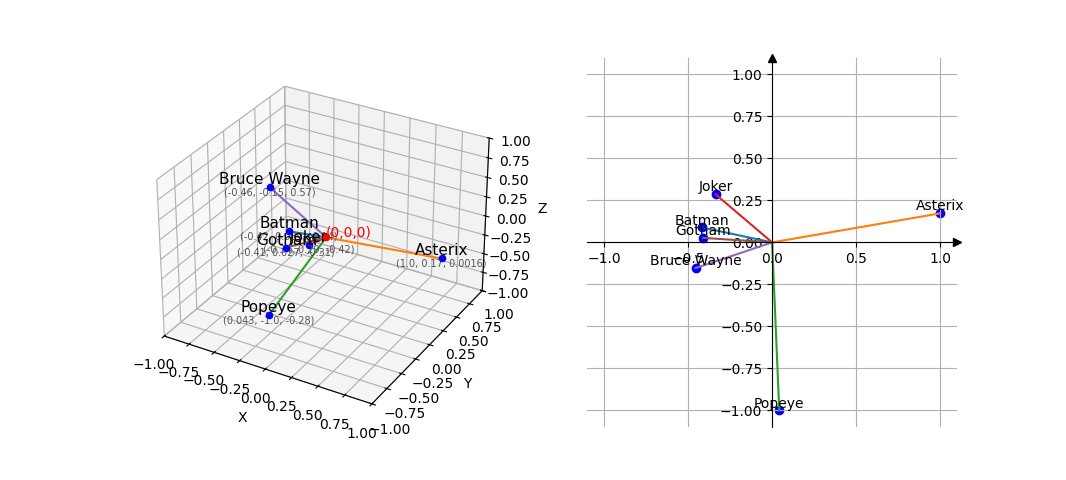

In [8]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.figure import figaspect
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def plot_3d(ax: Axes3D, series: pd.Series, coords: np.ndarray):
    # ax: Axes3D = fig.add_subplot(1, 2, 1, projection='3d') # type: ignore
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(left=-1, right=1)
    ax.set_ylim(bottom=-1, top=1)
    ax.set_zlim(bottom=-1, top=1)
    ax.scatter(0,0,0, color='r')
    ax.text(0,0,0, "(0,0,0)", color='r')

    for i in range(series.shape[0]):
        x = coords[i, 0]
        y = coords[i, 1]
        z = coords[i, 2]
        ax.scatter(x,y,z, color='b') # embedding's coordinates
        # ax.text(x,y,z, f"{df['Cartoon'][i]}", size=11, color='k', ha='center', va='bottom') # embedding's input
        ax.text(x,y,z, f"{series[i]}", size=11, color='k', ha='center', va='bottom') # embedding's input
        ax.text(x,y,z, f"({x:.2}, {y:.2}, {z:.2})", size=7, color='0.33', ha='center', va='top')
        ax.plot([0, x], [0, y], [0, z]) # lines from (0,0,0) to embedding

def plot_2d(ax: Axes, series: pd.Series, coords: np.ndarray, lines=True):
    # ax: Axes = fig.add_subplot(1, 2, 2)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    for i in range(series.shape[0]):
        x = coords[i, 0]
        y = coords[i, 1]
        plt.scatter(x, y, color='blue')
        plt.annotate(f"{series[i]}", (x,y), textcoords="offset points", xytext=(0,10), ha='center', va='top')
        if lines is True:
            ax.plot([0, x], [0, y]) # lines from (0,0,0) to embedding

embeddings_2dnorm = embedding.reduce_dimensionality_to(2, normalize=(-1,1))
embeddings_3dnorm = embedding.reduce_dimensionality_to(3, normalize=(-1,1))
df = embedding.get_data_frame()

fig = plt.figure(figsize=figaspect(0.45))

plot_3d(fig.add_subplot(1, 2, 1, projection='3d'), df['Cartoon'], embeddings_3dnorm)
plot_2d(fig.add_subplot(1, 2, 2), df['Cartoon'], embeddings_2dnorm)

plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

### How to compare vector embeddings?

We know that real objects (sentences, images, sounds) can be represented as vector embeddings.

To compare two vectors, we need to measure __distance__ between them. There are many ways (metrics) of calculating the distance.

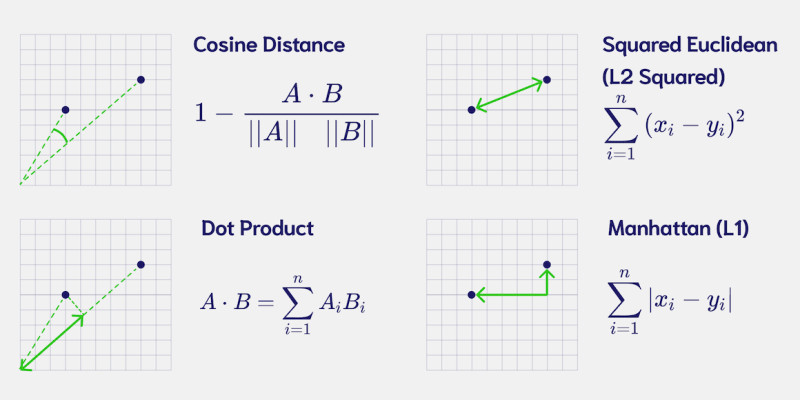

In a nutshell, the __distance__ between two vectors measures their __similiarity__:
- small distances suggest high similiarity
- large distances suggest low similiarity


#### Cosine similarity

__Cosine similarity__ is a metric that measures the cosine of the angle between two vectors $A$ and $B$ projected in n-dimensional space. 

> $\displaystyle S_{C}(A,B):=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}$

where __cosine distance__ is defined as follows
> $\displaystyle D_{C}(A,B):=1-\cos(\theta )=1-S_{C}(A,B)$

It's supported by machine learning libraries, e.g.
- [sklearn.metrics.pairwise.cosine_similarity](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)
- [torch.nn.functional.cosine_similarity](https://pytorch.org/docs/stable/generated/torch.nn.functional.cosine_similarity.html#torch.nn.functional.cosine_similarity)

In [9]:
print(cosine_similarity(np.array([[0.5, 1.0]]), np.array([[0.5, 1.0]])))   # exactly the same, cos(0°)
print(cosine_similarity(np.array([[-0.5, -1.0]]), np.array([[0.5, 1.0]]))) # exactly opposite, cos(180°)
print(cosine_similarity(np.array([[0.0, 1.0]]), np.array([[1.0, 0.0]])))   # orthogonal, cos(90°)
print(cosine_similarity(np.array([[1.0, 0.9]]), np.array([[0.9, 1.0]])))   # similar, ~cos(1°)
print(1-cosine_distances(np.array([[1.0, 0.9]]), np.array([[0.9, 1.0]])))  # similar, ~cos(1°)

[[1.]]
[[-1.]]
[[0.]]
[[0.99447514]]
[[0.99447514]]


### Example - visualize similarities of vector embeddings as heatmap

So far we know that two vector embeddings can be
- transformed from real objects (text, image, sound) into n-dimensional array
- projected in n-dimensional space 
- visually and intuitively compared to each other by humans
- mathematically and effectively compared to each other by computers

Having this in mind we can prepare the complete pipeline

| __sentences__ &rarr; model.tokenize &rarr; __tokens__ &rarr; model.encode &rarr; __embeddings__ &rarr; sklearn.metrics &rarr; __similarities__ &rarr; matplotlib.visualize |
|-|

#### Further reading
- [VA + Embeddings Browser: A Visual Survey of the Use of Embedding Approaches in Visual Analytics](https://va-embeddings-browser.ivis.itn.liu.se/) (webpage + research paper)

In [10]:
sentences = [
    "I am Batman",
    "I am Joker.",
    "My name is Bruce Wayne.",
    "Pizza is one of the most popular italian dishes.",
    "It's getting worse and worse in Gotham City and crime is skyrocketing.",
    "Who is Batman and why he is not here when Gotham city needs him?",
    "Finally Batman and Catgirl joined their forces against the evil opponent.",
    "Last autumn was full of colors. Mostly red and yellow."
]


def compute_similarity_scores(df:pd.DataFrame, func: Callable, adjust: tuple[float, float] | None = None):
    """
    Compute similarities between vector embeddings using a given function.
    
    If similarities' span between computed embedding vectors is small, it can be adjusted accordingly.
    Use it if e.g. similarity scores are concentrated in a small range and the corresponding colors on a heatmap looks almost the same.
    
    Parameters
    ----------
    df (pd.DataFrame) : vector embeddings
    func (Callable) : function to calculate similarity scores between vector embeddings
    adjust (tuple[float, float] | None, optional): interpolates the original similarity range to a given (min, max) range.
    
    Returns
    -------
    similarity_scores : computed between vector embeddings with the given function
    """
    dimension = df.shape[0]
    similarity_scores = np.zeros((dimension-1, dimension-1))
    # fill array with similarity score at the main diagonal and below
    for i in range(0, dimension):
        for j in range(i+1, dimension):
            similarity_scores[j-1][i] = func(
                np.array(df['Embedding'][i]).reshape(1,-1), 
                np.array(df['Embedding'][j]).reshape(1,-1)).item()
            if adjust is not None and j-1 != i:
                # copy values from below to above the main diagonal, otherwise normalization will take zeros into account
                similarity_scores[i][j-1] = similarity_scores[j-1][i]

    if adjust is not None:
        similarity_scores = np.interp(np.tril(similarity_scores), (similarity_scores.min(), similarity_scores.max()), (adjust[0], adjust[1]))
        similarity_scores = np.tril(similarity_scores)
    
    return similarity_scores

embedding_heatmap = Embedding(name='Cartoon', sentences=sentences, func=get_embedding_1)
df = embedding_heatmap.get_data_frame()

similarity_scores = compute_similarity_scores(df, func=cosine_similarity)
#similarity_scores = compute_similarity_scores(df, func=cosine_similarity, adjust=(0.0001,0.9999))

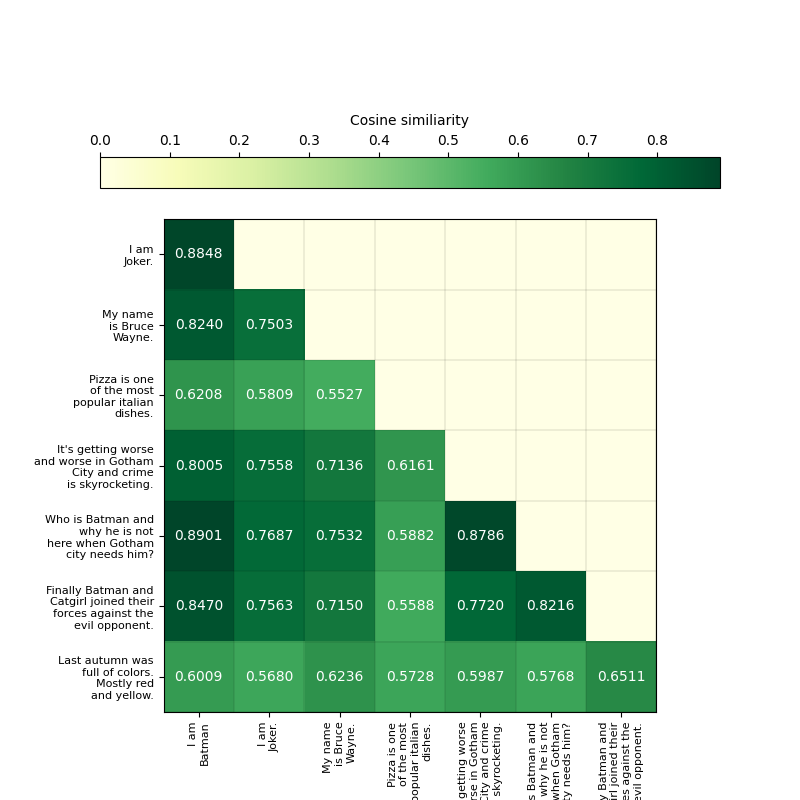

In [11]:
from matplotlib.colorbar import Colorbar
from matplotlib.cm import ScalarMappable
from matplotlib.figure import Figure
from matplotlib.image import AxesImage
from matplotlib import ticker

def create_heatmap(data: np.ndarray, row_labels: list[str], col_labels: list[str], 
                   fig:Figure, ax:Axes, cbar_kw=None, cbar_label=None, fontsize=8, **kwargs) -> ScalarMappable:
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im : AxesImage = ax.imshow(data, **kwargs)

    # Create colorbar
    if cbar_label is not None:
        cbar: Colorbar = fig.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_xlabel(cbar_label, va="bottom")
        # cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels, fontsize=fontsize, rotation=90, rotation_mode="anchor", ha="right", va="center")
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, fontsize=fontsize)

    ax.set_xticks(np.arange(-.5, data.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, data.shape[0], 1), minor=True)

    ax.grid(True, which="minor", color="black", linestyle='-', linewidth=0.1)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    return im

def annotate_heatmap(data: np.ndarray, im:ScalarMappable, valfmt="{x:.2f}", textcolors=("black", "white"), threshold=None, **kwargs):
    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be overwritten by textkw.
    kw = dict(ha="center", va="center")
    kw.update(kwargs)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = ticker.StrMethodFormatter(valfmt)

    # Loop over data dimensions and create text annotations.
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            value = valfmt(data[i][j], None)
            if value in ['0.00', '0.000', '0.0000']:
                value = ''
            text = ax.text(j, i, value, **kw)
            texts.append(text)

    return texts

def divide_sentence(chunk_size : int, sentence : str) -> str:
    chunks = sentence.split(' ')
    sentence_length = len(sentence)
    chunks_length = len(chunks)
    split_index = math.ceil(sentence_length / chunk_size)
    size = 0
    line_index = 1
    output = ''
    for i in range(chunks_length):
        size += len(chunks[i]) + 1
        output += chunks[i]
        if size < split_index * line_index:
             output += ' '
        else:
            output += '\n'
            line_index = line_index + 1
    return output.strip()

dimension = df.shape[0]
ylabels = [divide_sentence(4, s) for s in sentences][:dimension-1]
xlabels = [divide_sentence(4, s) for s in sentences][1:dimension]

fig, ax = plt.subplots(figsize=(8,8))

# for cmap, see https://matplotlib.org/stable/gallery/color/colormap_reference.html
im = create_heatmap(similarity_scores, xlabels, ylabels, fig=fig, ax=ax, cmap="YlGn", 
                          cbar_kw=dict(use_gridspec=False, location="top"), 
                          cbar_label="Cosine similiarity")
texts = annotate_heatmap(similarity_scores, im, valfmt="{x:.4f}")
plt.show()